
Country: Australia, Category: Furniture
 - Price Elasticity: 1.1385
 - R² Score: 0.3370

Country: Australia, Category: Technology
 - Price Elasticity: 5.6025
 - R² Score: 0.2164

Country: Australia, Category: Office Supplies
 - Price Elasticity: 0.0408
 - R² Score: 0.3101

Country: China, Category: Furniture
 - Price Elasticity: 1.0366
 - R² Score: 0.0825

Country: China, Category: Technology
 - Price Elasticity: 5.6750
 - R² Score: 0.7988

Country: China, Category: Office Supplies
 - Price Elasticity: 3.1455
 - R² Score: 0.8567


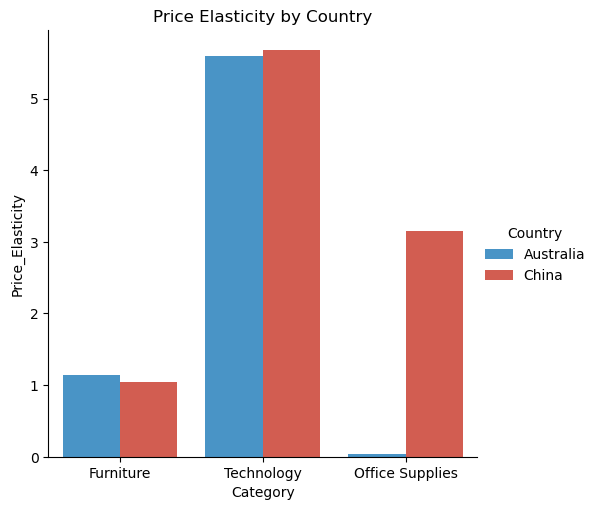

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

# 탄력성 분석 함수
df = pd.read_csv('superstore.csv')
df_copy = df[['Year','Country', 'Category', 'Sales', 'Discount', 'Quantity' ,'Profit']].copy()

aus_china = df_copy[(df.Country=='Australia') | (df.Country=='China')]
aus_china_sp = aus_china.groupby(['Year', 'Country', 'Category','Discount'])[['Quantity','Sales', 'Profit']].mean().reset_index().sort_values('Year')
countries = aus_china_sp['Country'].unique()
categories = aus_china_sp['Category'].unique()


def calculate_price_elasticity():
    elasticity_results = []
    
    for country in aus_china_sp['Country'].unique():
        for category in aus_china_sp['Category'].unique():
            subset = aus_china_sp[(aus_china_sp['Country'] == country) & 
                                (aus_china_sp['Category'] == category)]
            
            if len(subset) < 5:  # 데이터가 너무 적은 경우 건너뜀
                continue
                
            try:
                # 다중 회귀 분석 (탄력성 모델)
                model = smf.ols('Quantity ~ Discount + Sales + Profit', data=subset).fit()
                
                # 탄력성 값 저장
                elasticity = abs(model.params['Discount'])
                r2 = model.rsquared
                
                # 결과 출력
                print(f"\nCountry: {country}, Category: {category}")
                print(f" - Price Elasticity: {elasticity:.4f}")
                print(f" - R² Score: {r2:.4f}")
                
                elasticity_results.append({
                    'Country': country,
                    'Category': category,
                    'Price_Elasticity': elasticity,
                    'R2': r2
                })
                
            except Exception as e:
                print(f"Error in elasticity calculation for {country}, {category}: {e}")
                continue

    elasticity_df = pd.DataFrame(elasticity_results)
    
    # 할인 전략 추천
    elasticity_df['Discount_Strategy'] = pd.cut(
        elasticity_df['Price_Elasticity'],
        bins=[0, 0.5, 1.5, float('inf')],
        labels=['낮은 할인(0-10%)', '중간 할인(10-30%)', '높은 할인(30%+)']
    )

    return elasticity_df

# 데이터 분석 실행

# 탄력성 분석 실행 및 시각화
elasticity_df = calculate_price_elasticity()

# 시각화 실행
sns.catplot(
    data=elasticity_df, kind="bar",
    x="Category", y="Price_Elasticity", hue="Country",
    height=5, aspect=1, palette={"China": "#E74C3C", "Australia": "#3498DB"}
)

plt.title("Price Elasticity by Country")
plt.show()